# Inspecting Output

In [23]:
import pickle

## SFS

In [24]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/data/bottleneck_SFS.pkl', 'rb') as f:
    sfs = pickle.load(f)

In [25]:
sfs

Spectrum([-- 422.0 223.0 224.0 176.0 102.0 108.0 75.0 84.0 44.0 43.0 38.0 63.0 48.0
 42.0 18.0 33.0 33.0 21.0 37.0 --], folded=False, pop_ids=['N0'])

## Moments output

In [28]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/inferences/moments/bottleneck_fit_params.pkl', 'rb') as f:
    fit_params = pickle.load(f)

In [29]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/data/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [30]:
sampled_params

{'N0': 10000.0,
 'N_bottleneck': 2000.0,
 'N_recover': 5000.0,
 't_bottleneck_start': 300,
 't_bottleneck_end': 100}

In [31]:
fit_params

[{'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4814.863413334766,
  't_bottleneck_start': 282.53943228109597,
  't_bottleneck_end': 101.81965245016352,
  'loglik': 91.70641751371394},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4580.456382344627,
  't_bottleneck_start': 295.1713205319667,
  't_bottleneck_end': 100.03988696241754,
  'loglik': 91.70641751371394},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 5020.75243450225,
  't_bottleneck_start': 269.4637266675492,
  't_bottleneck_end': 103.97308060939703,
  'loglik': 91.70641751371394}]

## Dadi Output

In [33]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/inferences/dadi/bottleneck_fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [34]:
dadi_fit_params

[{'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4814.863413334769,
  't_bottleneck_start': 282.5394322810959,
  't_bottleneck_end': 101.81965245016355,
  'loglik': 9921.520456658549},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4874.666665077564,
  't_bottleneck_start': 288.33268504746843,
  't_bottleneck_end': 102.40508102020912,
  'loglik': 9921.520456658549},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4780.135965747534,
  't_bottleneck_start': 311.7612838315182,
  't_bottleneck_end': 113.75445442887344,
  'loglik': 9921.520456658549}]

## Stdpopsim Integration

In [7]:
import stdpopsim
species = stdpopsim.get_species("DroMel")
model = species.get_demographic_model("OutOfAfrica_2L06")

In [36]:
print(model.model.events[2].initial_size) # Ancestral population size
print(model.model.populations[0].initial_size) # Post expansion African population size
print(model.model.events[0].initial_size) # European bottleneck pop size
print(model.model.populations[1].initial_size) # Modern European population size
print(model.model.events[2].time) # Expansion of population in Africa
print(model.model.events[1].time) # African-European Divergence
print(model.model.events[0].time) # European population expansion|




1720600.0
8603000.0
2200
1075000.0
600000
158000
154600


In [29]:
model.model.events

[PopulationParametersChange(time=154600, initial_size=2200, growth_rate=None, population=1),
 MassMigration(time=158000, source=1, dest=0, proportion=1.0),
 PopulationParametersChange(time=600000, initial_size=1720600.0, growth_rate=None, population=0)]

In [3]:
model.model.populations[0].initial_size = 10

In [4]:
print(model.model.populations[0])


Population(initial_size=10, growth_rate=0, name='Mallard', description='Wild North American mallards', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0)


In [20]:
model.model.migration_matrix

array([[0.00000000e+00, 1.72048784e-06, 0.00000000e+00],
       [1.72048784e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [37]:
a = model.model.to_demes()

In [38]:
a

Graph(description='', time_units='generations', generation_time=1, doi=[], metadata={}, demes=[Deme(name='AFR', description='African D. melanogaster population', start_time=inf, ancestors=[], proportions=[], epochs=[Epoch(start_time=inf, end_time=600000, start_size=1720600.0, end_size=1720600.0, size_function='constant', selfing_rate=0, cloning_rate=0), Epoch(start_time=600000, end_time=0, start_size=8603000.0, end_size=8603000.0, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='EUR', description='European D. melanogaster population', start_time=158000, ancestors=['AFR'], proportions=[1.0], epochs=[Epoch(start_time=158000, end_time=154600, start_size=2200, end_size=2200, size_function='constant', selfing_rate=0, cloning_rate=0), Epoch(start_time=154600, end_time=0, start_size=1075000.0, end_size=1075000.0, size_function='constant', selfing_rate=0, cloning_rate=0)])], migrations=[], pulses=[])

In [ ]:
model.populations

[Population(initial_size=10000, growth_rate=0.0, name='YRI', description='1000 Genomes YRI (Yoruba)', extra_metadata={'id': 'YRI', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=0),
 Population(initial_size=10000, growth_rate=0.0, name='CEU', description='1000 Genomes CEU (Utah Residents (CEPH) with Northern and Western European Ancestry)', extra_metadata={'id': 'CEU', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=1),
 Population(initial_size=10000, growth_rate=0.0, name='NEA', description='Neandertals', extra_metadata={'id': 'NEA', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=2)]

In [31]:
model.model.items

<bound method Mapping.items of Demography(populations=[Population(initial_size=10000, growth_rate=0.0, name='YRI', description='1000 Genomes YRI (Yoruba)', extra_metadata={'id': 'YRI', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=0), Population(initial_size=10000, growth_rate=0.0, name='CEU', description='1000 Genomes CEU (Utah Residents (CEPH) with Northern and Western European Ancestry)', extra_metadata={'id': 'CEU', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=1), Population(initial_size=10000, growth_rate=0.0, name='NEA', description='Neandertals', extra_metadata={'id': 'NEA', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=2)], events=[MigrationRateChange(time=855, rate=0, source=-1, dest=-1), MigrationRateChange(time=856, rate=3.0237561476818266e-07, source=1, dest=2), MigrationRateChange(time=857, rate=3.0941225088385424e-07, source=1, dest=2), MigrationRateChange(time=858, rate=3.165909078218426e-07, 

In [5]:
import stdpopsim, msprime          # only two deps

def customise_ooa_extended_pulse(**kwargs) -> msprime.Demography:
    """
    Return an **msprime.Demography** object identical to
    `OutOfAfricaExtendedNeandertalAdmixturePulse_3I21`, except that any keyword
    you pass here replaces the model’s default value.

    Valid keywords  (all optional) ────────────────────────────────────────────
        NYRI, NCEU, NNEA            – population sizes
        T_OOA, T_NEASPLIT           – split times  (generations, *not* kya)
        T_PULSE_START, T_PULSE_END  – pulse window (generations)
        M_NEApCEU                   – per-generation NEA→CEU migration rate
    """
    # 1) grab the original
    species = stdpopsim.get_species("HomSap")
    dem = species.get_demographic_model(
            "OutOfAfricaExtendedNeandertalAdmixturePulse_3I21").model.copy()

    # 2) sizes -------------------------------------------------------------
    size_map = {"YRI": "NYRI", "CEU": "NCEU", "NEA": "NNEA"}
    for pop in dem.populations:
        if size_map[pop.name] in kwargs:
            pop.initial_size = kwargs[size_map[pop.name]]

    # 3) split times -------------------------------------------------------
    for ev in dem.events:                     # works in any msprime ≥1.0
        # CEU & YRI split (OOA)
        if isinstance(ev, msprime.MassMigration) and ev.source == 1 and ev.dest == 0:
            if "T_OOA" in kwargs:
                ev.time = kwargs["T_OOA"]
        # NEA–human split
        if isinstance(ev, msprime.MassMigration) and ev.source == 2 and ev.dest == 0:
            if "T_NEASPLIT" in kwargs:
                ev.time = kwargs["T_NEASPLIT"]

    # 4) overwrite pulse: drop old events, add ours ------------------------
    pulse_keys = {"T_PULSE_START", "T_PULSE_END", "M_NEApCEU"}
    if pulse_keys & kwargs.keys():
        dem.migration_rate_changes = [  # keep only non-NEA→CEU records
            m for m in dem.migration_rate_changes
            if not (m.source == "NEA" and m.dest == "CEU")
        ]
        # add fresh ones
        start = kwargs.get("T_PULSE_START", 1700)   # defaults = original
        end   = kwargs.get("T_PULSE_END",   900)
        rate  = kwargs.get("M_NEApCEU",     0.03)
        dem.migration_rate_changes.extend([
            msprime.MigrationRateChange(time=start, rate=rate,
                                        source="NEA", dest="CEU"),
            msprime.MigrationRateChange(time=end,   rate=0.0,
                                        source="NEA", dest="CEU"),
        ])

    return dem              # ready for msprime.sim_ancestry / .to_demes()

# ── example ─────────────────────────────────────────────────────────────
custom_demog = customise_ooa_extended_pulse(
    NYRI=8000, NCEU=12000, T_OOA=2500,
    T_PULSE_START=1800, T_PULSE_END=1000, M_NEApCEU=0.02
)

AttributeError: 'Demography' object has no attribute 'migration_rate_changes'

In [7]:
import stdpopsim, msprime

species = stdpopsim.get_species("HomSap")
cat_model = species.get_demographic_model(
    "OutOfAfricaExtendedNeandertalAdmixturePulse_3I21")

# In >= v0.3 the `model` attribute *is* an msprime.Demography
demo = cat_model.model.copy()      # make our own editable copy


In [8]:
# Double the present-day CEU size
demo["CEU"].initial_size *= 2

# Cut YRI↔CEU symmetric migration in half
new_matrix = demo.migration_matrix * 0.5
demo.set_migration_matrix(new_matrix)

# Remove the Neandertal→CEU pulse completely
demo.events = [e for e in demo.events
               if not (isinstance(e, msprime.MassMigration)
                       and e.dest == demo["CEU"].id)]


AttributeError: 'Demography' object has no attribute 'set_migration_matrix'

In [3]:
import pickle 
with open('/sietch_colab/akapoor/Infer_Demography/split_isolation/runs/run_0001/data/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [4]:
sampled_params

{'N0': 16609,
 'N1': 4950,
 'N2': 8727,
 'm': 6.97398292256458e-05,
 't_split': 4673}

In [1]:
import pickle
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_isolation/inferences/sim_0/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [2]:
dadi_fit_params

{'best_params': [array([2.18331227e+03, 2.95178502e+04, 2.18282507e+04, 3.23288191e-05,
         2.00000000e+04]),
  array([2.18331227e+03, 2.96051878e+04, 2.17271273e+04, 3.24199928e-05,
         2.00000000e+04])],
 'best_lls': [-576.9923217184846, -577.0031443763118]}

In [3]:
import pickle
with open('/projects/kernlab/akapoor/Infer_Demography/experiments/bottleneck/inferences/sim_0/all_inferences.pkl', 'rb') as f:
    all_inferences = pickle.load(f)

In [4]:
all_inferences

{'moments': {'best_params': ['N0'], 'best_lls': [94.73367150869032]},
 'dadi': {'best_params': ['N0'], 'best_lls': [-93.64312380114049]},
 'momentsLD': {'opt_params': {'N_bottleneck': 866.1572336041122,
   'N_recover': 9078.351185941146,
   't_bottleneck_start': 1554.509181997806,
   't_bottleneck_end': 849.999013978426,
   'N0': 9078.351185941146},
  'loglik': 2.699875797913049}}

In [11]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/inferences/sim_1/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [12]:
dadi_fit_params

{'best_params': [{'N0': 8139.331591383296,
   'N_bottleneck': 958.8227460999914,
   'N_recover': 19999.99999999998,
   't_bottleneck_start': 1700.9999999999998,
   't_bottleneck_end': 258.7649152312198}],
 'best_lls': [113.29296357567316]}

In [16]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/inferences/sim_0/all_inferences.pkl', 'rb') as f:
    all_inferences = pickle.load(f)

In [17]:
all_inferences

{'moments': {'best_params': [{'N0': 17555.922337392178,
    'N1': 7796.562630626548,
    'N2': 12188.245160817358,
    'm': 4.018009136894766e-05,
    't_split': 18341.851191110814},
   {'N0': 17555.922337392178,
    'N1': 7796.708576402069,
    'N2': 12188.846928503957,
    'm': 4.0178371412684415e-05,
    't_split': 18334.402769613047}],
  'best_lls': [1243.4709811391656, 1243.470970482198]},
 'dadi': {'best_params': [{'N0': 17555.922337392178,
    'N1': 7117.711335063998,
    'N2': 11075.137977795626,
    'm': 4.1700761922239436e-05,
    't_split': 9757.10177708768},
   {'N0': 17555.922337392178,
    'N1': 6561.476467594923,
    'N2': 10659.345933590477,
    'm': 4.9848274037219946e-05,
    't_split': 10979.275976153536}],
  'best_lls': [-1260.0160623676284, -1266.7306647855562]},
 'momentsLD': {'opt_params': {'N1': 9242.37313771942,
   'N2': 15812.570081954216,
   't_split': 119530.21366212315,
   'N0': 2.7379734966532323e-05},
  'loglik': 795.6257660955346}}

In [18]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/inferences/sim_0/MomentsLD/best_fit.pkl', 'rb') as f:
    moments_ld_fit_params = pickle.load(f)

In [19]:
moments_ld_fit_params

{'opt_params': {'N1': 9242.37313771942,
  'N2': 15812.570081954216,
  't_split': 119530.21366212315,
  'N0': 2.7379734966532323e-05},
 'loglik': 795.6257660955346}

In [20]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/features_df.pkl', 'rb') as f:
    features_df = pickle.load(f)

In [21]:
features_df

,dadi_N0,dadi_N1,dadi_N2,dadi_m,dadi_t_split,momentsLD_N0,momentsLD_N1,momentsLD_N2,momentsLD_t_split,moments_N0,moments_N1,moments_N2,moments_m,moments_t_split
0,27051.562034,9949.378242,28082.614239,1.000000e-04,20000.000000,0.000105,7994.337919,21422.108537,16877.797163,27051.562034,9352.126623,26864.245537,1.000000e-04,8927.871648
1,5305.061322,27749.605542,23754.806228,9.582252e-05,15789.871745,0.000092,24449.426021,23377.603484,13527.806240,5305.061322,25111.606610,21847.223620,1.000000e-04,13472.235464
2,892.646884,4144.794726,9465.692506,6.043604e-05,11920.055913,0.000030,3903.313494,11639.600790,16024.431945,892.646884,5205.814538,11866.869716,4.580140e-05,15482.503953
3,19694.516099,259.300264,27107.609489,7.448504e-06,10156.868476,0.000013,4190.264888,132138.975842,3981.106398,19694.516099,356.684642,30000.000000,7.045962e-07,6099.281912
4,1989.369097,12427.192636,19420.645371,1.000000e-08,2610.777694,0.000012,9149.690887,12481.147767,2040.356183,1989.369097,11772.023104,13416.484058,1.000000e-08,2264.584641
5,16354.776312,15772.093800,1981.981428,3.787637e-05,11220.777624,0.000019,17309.154642,2995.717584,13055.435774,16354.776312,20534.549276,2683.934423,1.754561e-05,9097.942884
6,20724.657112,8198.207681,15468.624606,7.375815e-05,9156.043594,0.000055,9343.365977,14421.681336,12115.132336,20724.657112,8160.467559,15457.205180,7.391561e-05,10565.725350
7,11046.918419,14301.561548,29230.637862,6.876497e-05,3896.273793,0.000172,8901.590328,18864.619718,6730.682371,11046.918419,14391.228542,30000.000000,4.595811e-05,3160.414693
8,8132.128583,21576.121740,20225.301189,1.000000e-04,13298.096884,0.000088,21661.696096,16506.883109,11471.758462,8132.128583,20406.116771,19115.703933,1.000000e-04,10946.701708
9,20598.423214,11106.480829,9888.703281,1.428229e-05,9747.122359,0.000022,11795.976739,10657.338593,14990.303983,20598.423214,11393.364741,10154.342320,1.406746e-05,10127.558813


In [22]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/targets_df.pkl', 'rb') as f:
    targets_df = pickle.load(f)

In [23]:
targets_df

,N0,N1,N2,m,t_split
0,27051.562034,7838.403122,22136.756040,0.000084,15727.693879
1,5305.061322,24058.315363,22966.330333,0.000076,13371.913601
2,892.646884,3897.212683,12243.226270,0.000028,15907.489103
3,19694.516099,308.414489,29639.305714,0.000012,11436.148031
4,1989.369097,9329.663905,14293.115351,0.000009,2123.304935
5,16354.776312,17026.067954,3003.480890,0.000018,13052.371370
6,20724.657112,8608.476479,15386.152568,0.000048,9019.781476
7,11046.918419,11344.860805,29819.918632,0.000057,3825.123643
8,8132.128583,19417.398262,16510.087674,0.000084,11050.358315
9,20598.423214,11909.330914,11143.304415,0.000020,14952.875347


In [24]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/inferences/sim_3/MomentsLD/best_fit.pkl', 'rb') as f:
    moments_ld_fit_params = pickle.load(f)

In [25]:
moments_ld_fit_params

{'best_params': {'N1': 2713.565306385988,
  'N2': 30625.431154930124,
  't_split': 196770.88000685372,
  'N0': 1.916556906860545e-05},
 'best_lls': 115.64566252077942}

In [1]:
import pickle
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/inferences/sim_0/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [2]:
dadi_fit_params

{'best_params': [{'N0': 6060.303776052738,
   'N_bottleneck': 681.0573336946379,
   'N_recover': 18622.343331919557,
   't_bottleneck_start': 2249.3304304384606,
   't_bottleneck_end': 926.7103582957724},
  {'N0': 6060.303776052738,
   'N_bottleneck': 681.0573336946379,
   'N_recover': 18621.626069275848,
   't_bottleneck_start': 2249.3647848809032,
   't_bottleneck_end': 926.6644232814249}],
 'best_lls': [-160.7920262536436, -160.79202662729494]}

In [3]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/inferences/sim_0/all_inferences.pkl', 'rb') as f:
    all_inferences = pickle.load(f)

In [4]:
all_inferences

{'moments': {'best_params': [{'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 14686.018006626999,
    't_bottleneck_start': 2384.90104967301,
    't_bottleneck_end': 729.8667838286508},
   {'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 14686.02132410507,
    't_bottleneck_start': 2384.90113533676,
    't_bottleneck_end': 729.8667889233898}],
  'best_lls': [166.02082074880946, 166.02081969192204]},
 'dadi': {'best_params': [{'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 18622.343331919557,
    't_bottleneck_start': 2249.3304304384606,
    't_bottleneck_end': 926.7103582957724},
   {'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 18621.626069275848,
    't_bottleneck_start': 2249.3647848809032,
    't_bottleneck_end': 926.6644232814249}],
  'best_lls': [-160.7920262536436, -160.79202662729494]},
 'momentsLD': {'best_params': {'N_bottleneck': 681.05733369

In [5]:
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_migration/modeling/features_df.pkl', 'rb') as f:
    features_df = pickle.load(f)

In [6]:
features_df.columns

Index(['dadi_N0_rep_0', 'dadi_N1_rep_0', 'dadi_N2_rep_0', 'dadi_m12_rep_0',
       'dadi_m21_rep_0', 'dadi_t_split_rep_0', 'momentsLD_N0', 'momentsLD_N1',
       'momentsLD_N2', 'momentsLD_m12', 'momentsLD_m21', 'momentsLD_t_split',
       'moments_N0_rep_0', 'moments_N1_rep_0', 'moments_N2_rep_0',
       'moments_m12_rep_0', 'moments_m21_rep_0', 'moments_t_split_rep_0'],
      dtype='object')

In [7]:
features_df

,dadi_N0_rep_0,dadi_N1_rep_0,dadi_N2_rep_0,dadi_m12_rep_0,dadi_m21_rep_0,dadi_t_split_rep_0,momentsLD_N0,momentsLD_N1,momentsLD_N2,momentsLD_m12,momentsLD_m21,momentsLD_t_split,moments_N0_rep_0,moments_N1_rep_0,moments_N2_rep_0,moments_m12_rep_0,moments_m21_rep_0,moments_t_split_rep_0
0,16082.498766,15963.250412,17901.403598,0.000045,0.000048,3991.010112,2.434486e+04,2.432709e+04,2.442305e+04,1.985560e-12,6.693803e-05,4.992134e+03,17753.998124,15412.902597,20396.462638,0.000059,1.000000e-04,9032.902059
1,15585.349329,1407.931730,15471.998076,0.000042,0.000036,10136.448244,2.999049e+04,9.490894e+03,1.111980e+04,0.000000e+00,6.998668e-05,4.577467e+04,16638.666049,3197.512862,21093.579885,0.000031,1.000000e-08,11649.095047
2,15489.627724,18316.250883,584.850800,0.000047,0.000051,11057.696395,1.306038e+161,7.826075e+184,1.587973e+149,0.000000e+00,0.000000e+00,6.703269e+149,5630.152853,25483.744215,1002.389337,0.000012,5.000403e-05,16685.583465
3,19025.175918,4809.546815,8334.445504,0.000037,0.000089,12328.162642,9.807083e+03,4.896605e+03,9.945167e+03,1.088597e-04,1.357081e-05,6.024716e+03,27168.240967,5356.504586,10108.504807,0.000024,7.947507e-05,8410.380465
4,14436.099177,15888.209535,814.233665,0.000046,0.000051,10840.562986,6.055581e+03,1.808949e+04,1.766665e+03,3.698245e-05,9.398886e-09,2.072104e+05,16883.291132,15274.205747,793.989526,0.000050,5.567120e-05,20000.000000
5,8566.926103,7178.517832,22880.701732,0.000064,0.000059,14367.829164,2.615202e+04,1.856022e+04,2.449799e+04,7.386080e-116,1.091604e-04,2.638781e+06,8394.062781,7165.451567,22639.197063,0.000064,6.021152e-05,15183.711437
6,3760.139040,8401.399502,20739.540090,0.000054,0.000029,11107.205919,1.658502e+04,1.741497e+04,1.681184e+04,2.305927e-05,8.437017e-05,3.987593e+04,3183.790971,8152.152206,16731.299232,0.000078,1.372347e-05,9539.252320
7,16603.923119,17230.188210,15764.375667,0.000078,0.000071,1107.309203,1.006946e+04,1.010693e+04,1.002690e+04,9.485597e-04,1.009502e-04,2.068264e+03,11923.516694,28688.171766,16442.247222,0.000046,1.000000e-04,1163.798088
8,13137.655566,15825.550120,17527.592845,0.000059,0.000036,12616.309097,1.959806e+04,1.958889e+04,2.009946e+04,4.025654e-05,5.423711e-05,1.620766e+04,15145.374103,17624.901810,20512.541460,0.000048,3.346427e-05,13972.980570
9,6459.430004,18722.344791,22966.920719,0.000065,0.000049,1132.966378,1.116478e+04,1.934806e+04,9.096435e+03,4.300565e-10,4.072380e-04,2.180728e+03,8710.664289,24580.577430,30000.000000,0.000100,3.660772e-08,1518.210604


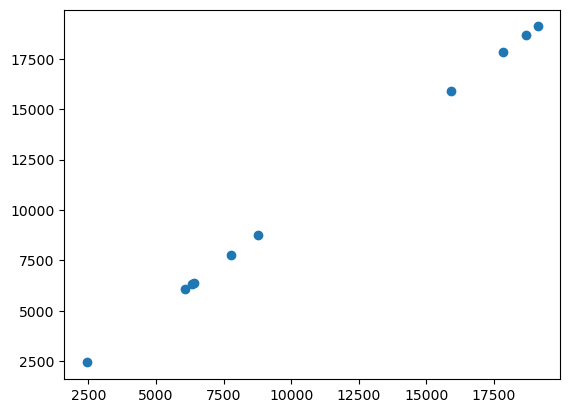

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(features_df['dadi_N0_rep_0'], features_df['dadi_N0_rep_1'])

In [1]:
import pickle
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_migration/inferences/sim_2/MomentsLD/best_fit.pkl', 'rb') as f:
    moments_ld_fit_params = pickle.load(f)

In [2]:
moments_ld_fit_params

{'best_params': {'N1': 7.826074609936462e+184,
  'N2': 1.5879731514952378e+149,
  't_split': 6.703269241266377e+149,
  'm12': 0.0,
  'm21': 0.0,
  'N0': 1.3060375438864104e+161},
 'best_lls': 29123.263872521875}

In [ ]:
import pickle
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_isolation/modeling/features_norm_df.pkl', 'rb') as f:
    features_norm_df = pickle.load(f)



In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_isolation/modeling/features_train_norm_df.pkl', 'rb') as f:
    features_train_norm_df = pickle.load(f)

In [29]:
features_train_norm_df

,dadi_N0_rep_0,dadi_N1_rep_0,dadi_N2_rep_0,dadi_m_rep_0,dadi_t_split_rep_0,momentsLD_N0,momentsLD_N1,momentsLD_N2,momentsLD_m,momentsLD_t_split,moments_N0_rep_0,moments_N1_rep_0,moments_N2_rep_0,moments_m_rep_0,moments_t_split_rep_0
5,-0.158925,0.194475,0.015698,-0.433310,0.382831,-1.309091,-3.902745e-01,-1.422830,-0.252876,4.479452,-0.708827,-0.489909,-0.607202,0.266814,-0.378919
25,1.484412,-0.084558,-0.017086,-0.504119,-0.565155,-1.542972,-8.026419e-01,-1.311233,-0.427209,1.758854,1.457205,-0.103038,-0.039175,-0.530757,-0.618105
20,0.212044,1.732051,-0.047958,0.569460,-1.382926,-1.210635,-7.228522e-04,-0.841419,0.433394,11.679376,0.710184,1.732051,0.163565,1.732051,-1.043759
49,-0.051176,-1.705103,0.010715,-0.297579,0.022947,0.922231,6.134543e-01,1.230332,1.087612,-0.342288,-0.123863,-1.673506,-0.196014,-1.732051,-0.989029
39,-0.955103,-1.040122,0.149688,0.328356,-0.639844,-0.057216,-1.050077e+00,-1.073609,0.699734,-1.305863,-0.712661,-0.840002,0.740782,-0.266262,-0.452474
27,0.034951,-0.005839,1.732051,1.131085,-0.527334,-1.351199,3.934360e-01,1.575744,0.020678,32.457509,-0.056212,-0.125979,1.732051,1.218241,-0.633157
47,-1.617432,0.572803,0.710965,0.142166,-0.054877,-0.066614,5.531379e-02,-0.199078,2.611248,0.996540,-1.664251,0.407684,0.198299,0.859672,-1.112562
45,0.015703,-1.612186,-0.582375,1.168720,-0.501406,0.339215,4.408556e-01,-0.041261,-0.427254,2.459524,-0.411388,-1.612055,0.897690,1.732051,0.575649
46,-1.152730,0.627092,-1.457174,0.278399,0.636091,-0.479865,4.301584e+00,-1.569979,-1.732397,-1.580269,-1.076821,0.826387,-1.469971,0.399577,0.452843
17,0.158143,-0.850384,0.333684,-0.101485,-1.095955,1.337167,1.225665e+00,1.372963,-1.422467,1.569536,0.532056,-0.706623,0.756143,-0.465909,-1.016179


In [32]:
np.min(features_train_norm_df['momentsLD_N1'])

-1.1193215656766378